In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks/nature_cancer_building_blocks_analysis'

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, generate_abundance_matrix
from src.utils.visualization import plot_scatter_pca, plot_cumulative_explained_variance, plot_PCAs, plot_CVEs

In [7]:
ROOT_DATA_PATH = "../../../output/tnbc_nature_cancer_dataset/"
CELL_TYPES = ['Fibroblasts', 'Fibroblasts CD68+', 'T cells', 'Myofibroblasts', 'HR- CKlow CK5+', 
              'Macrophages Vim+ Slug+', 'HR- CK7-','Endothelial', 'Basal CKlow', 'Macrophages Vim+ Slug-',
              'Macrophages Vim+ CD45low', 'Vascular SMA+', 'HRlow CKlow','HR+ CK7-', 'HR+ CK7- Ki67+', 'HR- CK7+', 
              'HER2+', 'HR- Ki67+','Myoepithelial', 'HR+ CK7- Slug+', 'B cells', 'Hypoxia']
patient_ids = [ 88, 428, 357, 389, 303, 445, 374,  33, 549, 537, 477, 393, 429, 329, 443, 305, 105, 469, 555, 
               532,   6, 422,  40, 415,   7, 221, 10, 395, 494, 332, 409,  87, 479, 359,  36, 265, 273, 229, 261, 
               184, 181, 521, 102, 468, 509,  92,  94, 331, 260, 250, 233, 234,236, 231, 170, 365, 175, 154,  19, 
               132,  98,  58,  61,  16,  63,432, 361, 263, 426, 366,  35, 340,   1, 336]

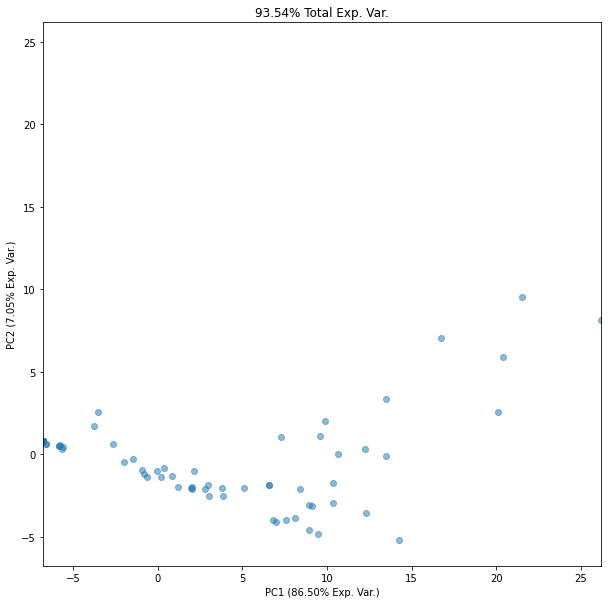

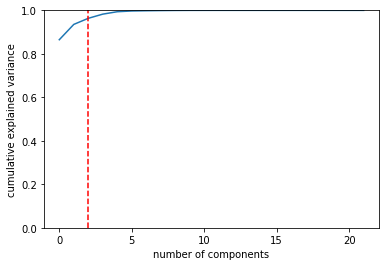

In [8]:
N_SITE = 100
PATIENT_ID = 357
RADIUS = 100

METHOD = 'abs'
PCA_SCALED = False 

cell_ab = CellAbundance(PATIENT_ID, N_SITE, RADIUS, CELL_TYPES, method=METHOD, root=ROOT_DATA_PATH)
pc = cell_ab.perform_PCA(scale=PCA_SCALED)
plot_scatter_pca(pc, cell_ab.pca.explained_variance_ratio_)
plot_cumulative_explained_variance(cell_ab.pca.explained_variance_ratio_)

In [9]:
patients_id_reduced = random.sample(patient_ids, 40)
absolute_ca_list = generate_abundance_matrix(CELL_TYPES, patients_id_reduced, N_SITE, RADIUS, method='abs', root=ROOT_DATA_PATH)

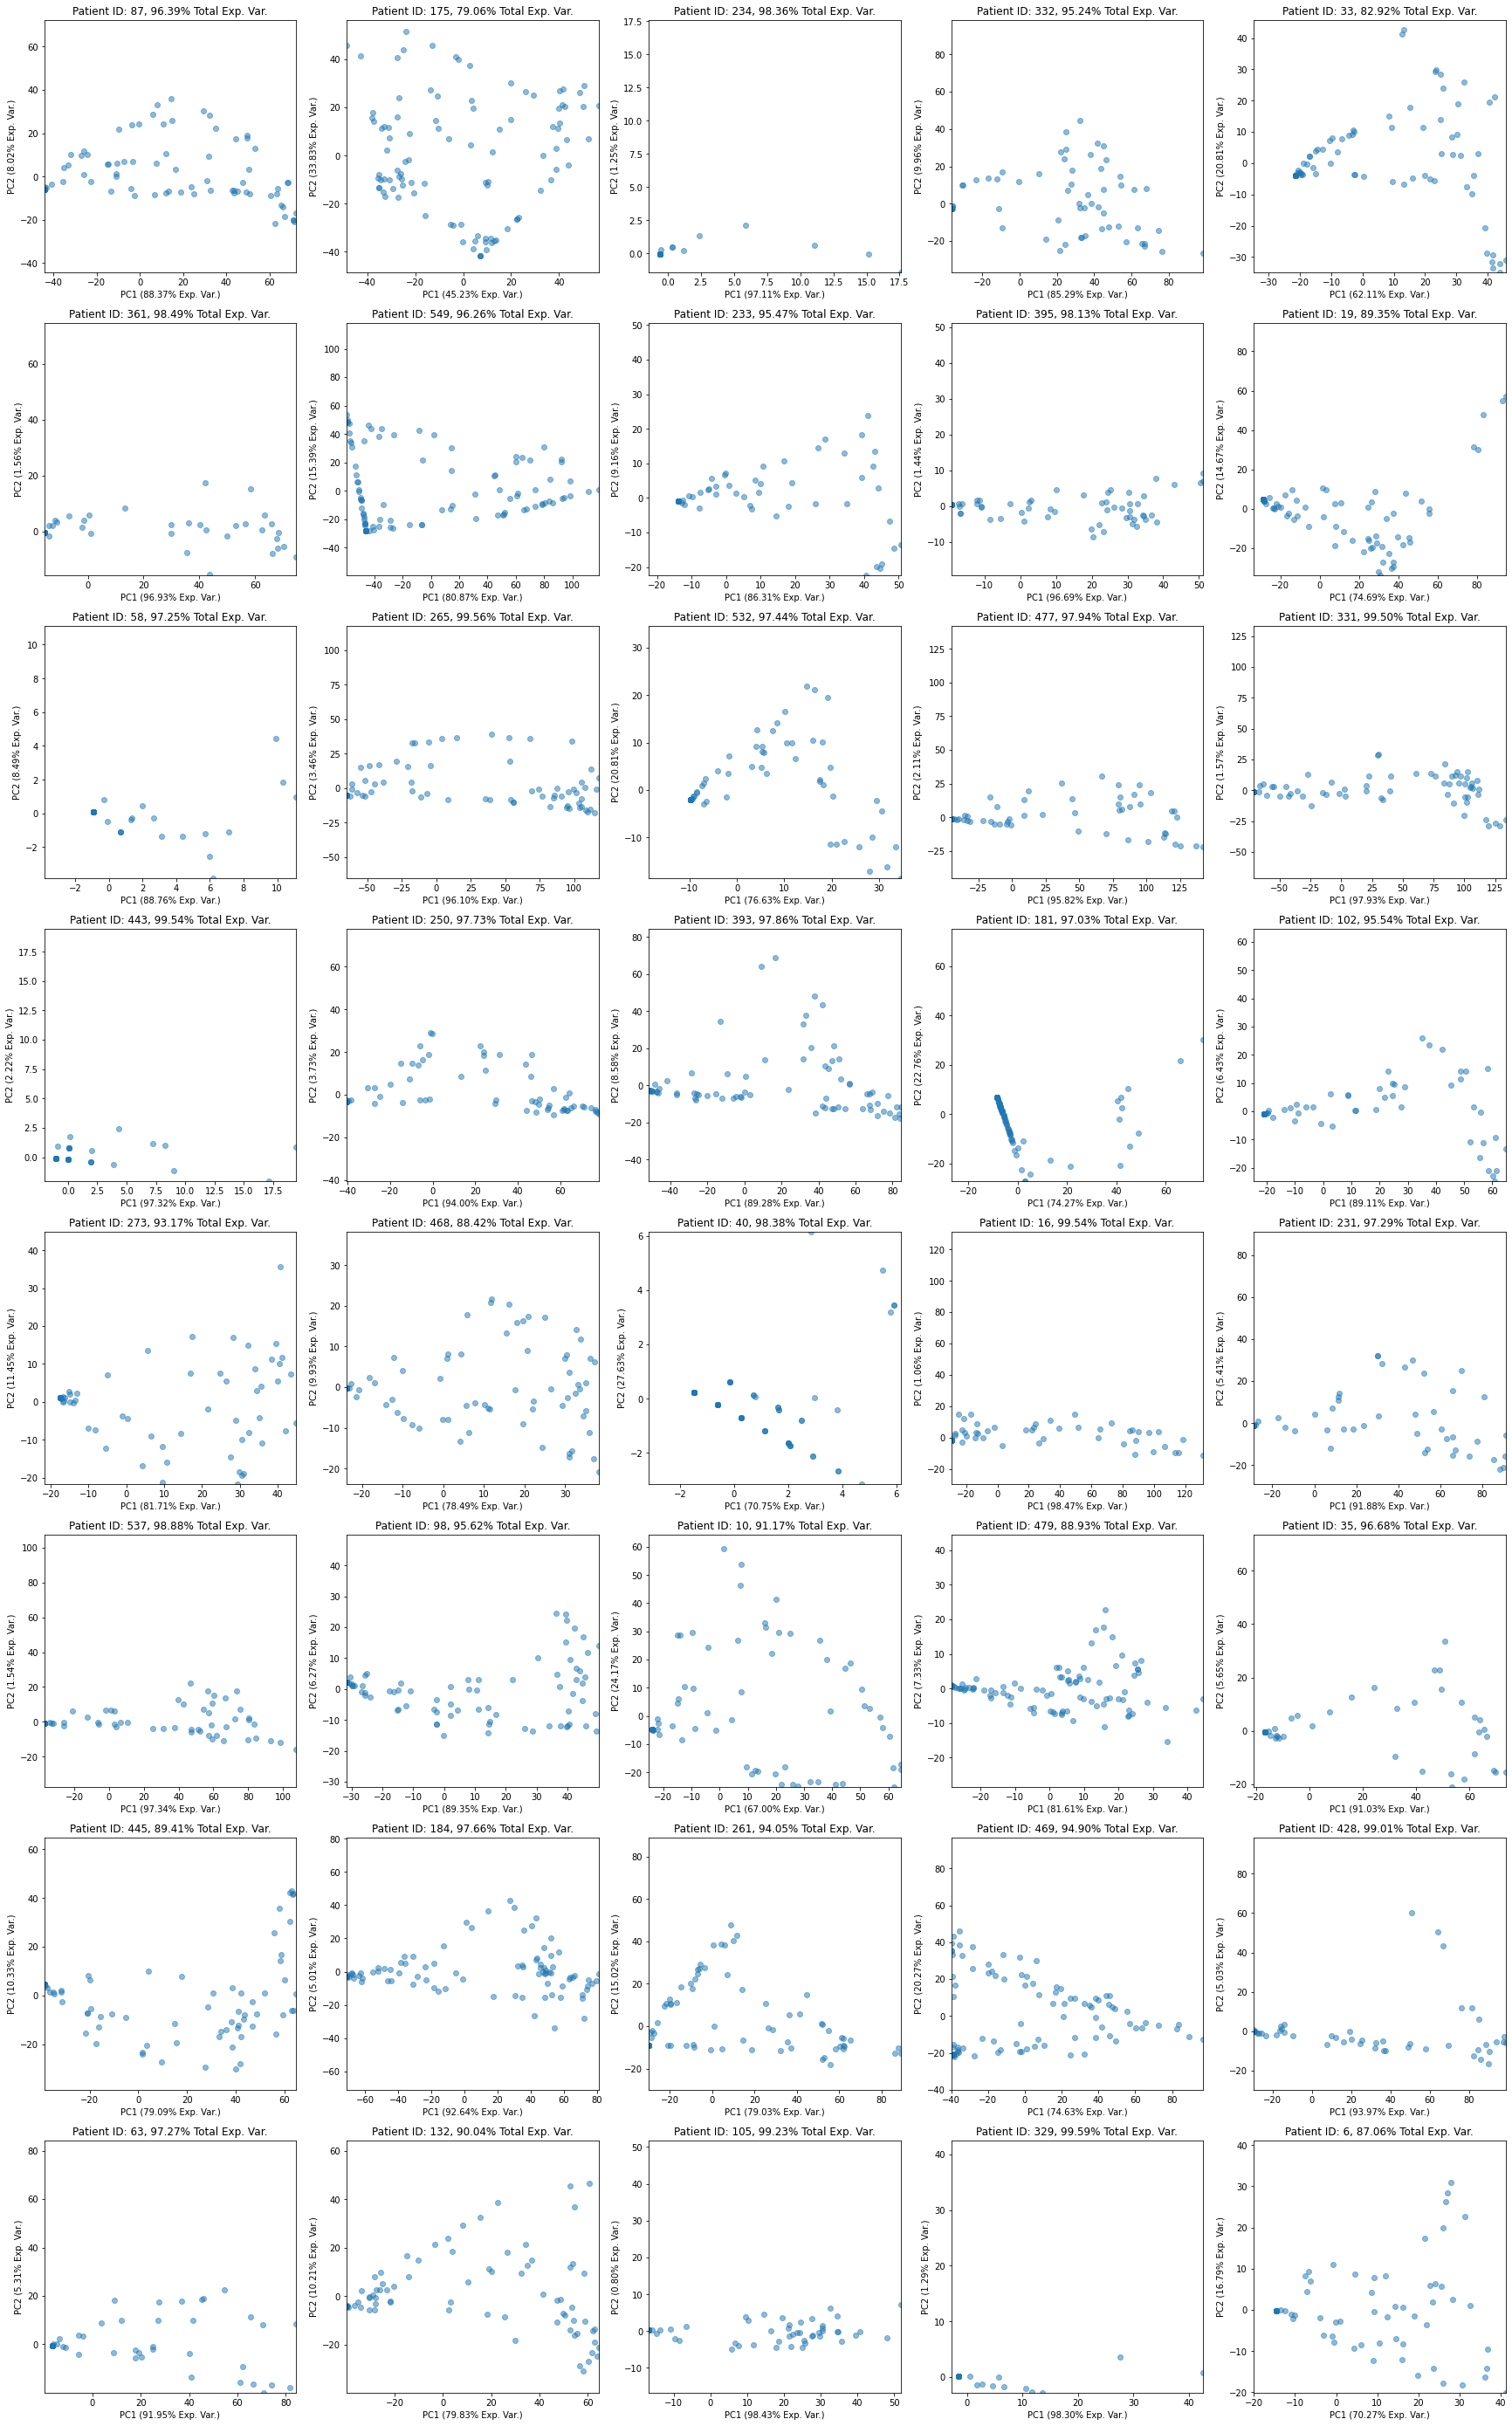

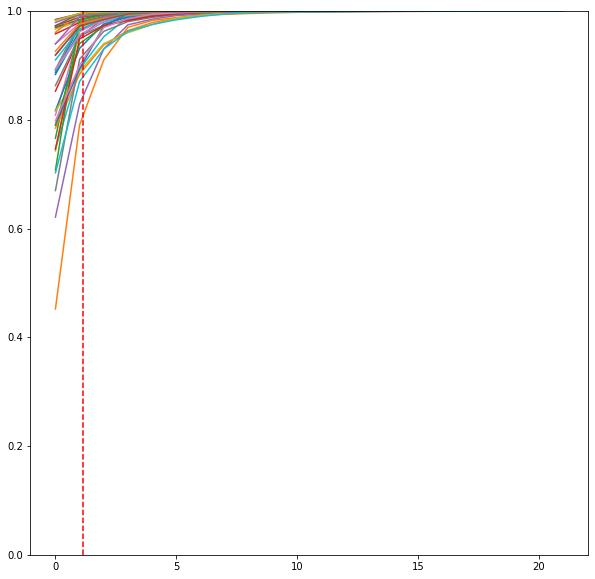

In [10]:
scaling = False
plot_PCAs(absolute_ca_list, scale_pca=scaling)
plot_CVEs(absolute_ca_list, scale_pca=scaling)